can be used for classification and regression.To claculate the distance it uses Euclidean distance,
hamming distance-using in predict descreate/categorial
minkowski
manhattan
knn dows not assume ie not probalistic

we use when the problem is sensive.
works well in small data
we  avaluate knn classification using accuracy,precision,F1 measure


OBJECTIVE:Predict which type of cancer the patient has ie malignin or Benig.Ie measure diameter of cell

1.use case

predict whether the patient has Benig or Malignin cancers

2.Collect and load the data ie import required libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# machine learning libraries

from sklearn.neighbors import KNeighborsClassifier

# import for spliting

from sklearn.model_selection import train_test_split

# Evaluate model library

from sklearn.metrics import accuracy_score,classification_report

np.random.seed(1234)
plt.style.use('ggplot')

load data

In [107]:
df=pd.read_csv("cancer_data.csv")

In [108]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [109]:
df.shape

(569, 33)

In [110]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [111]:
features=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]



In [112]:
target=df['diagnosis']

split data to train and test set

In [113]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3)

In [114]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((398, 30), (171, 30), (171,), (398,))

6.Training our model

In [121]:
model=KNeighborsClassifier(n_neighbors=7)


In [116]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [117]:
predictions=model.predict(x_test)
predictions[0:10]

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

In [118]:
accuracy_score(predictions,y_test)

0.935672514619883

In [119]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          B       0.93      0.97      0.95       105
          M       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



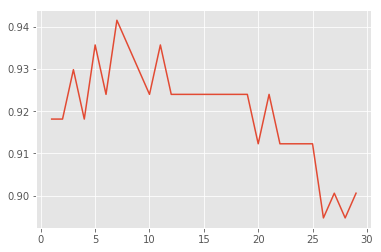

In [120]:
k_values=range(1,30)
accuracy=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy.append(accuracy_score(y_pred,y_test))
    
plt.plot(k_values,accuracy)
plt.show()

In [122]:
save("model.plk")

'' was not found in history, as a file, url, nor in the user namespace.
